In [2]:
#IMPORT DATA
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('/Users/sydneypeno/Downloads/WPI_Utilities_Tighe.csv')


print(data.head())

   Unit num                  Unit Name  Building Fuel/Chemical Quantity Used  \
0       4.0         Founders Boiler #4  Founders   Natural Gas     4,201,137   
1       4.0         Founders Boiler #4  Founders   Natural Gas     4,201,137   
2       4.0         Founders Boiler #4  Founders   Natural Gas     4,201,137   
3       7.0  Generator #1 Daniels Hall   Daniels   Natural Gas        36,201   
4       7.0  Generator #1 Daniels Hall   Daniels   Natural Gas        36,201   

  Unit of Mea Pollutant Emission Factor            Unit of Mea2  \
0  cubic feet       CO2         120,000  lbs CO2/106 cubic feet   
1  cubic feet       CH4          2.2708  lbs CH4/106 cubic feet   
2  cubic feet       N2O          0.2205  lbs N2O/106 cubic feet   
3  cubic feet       CO2         120,020  lbs CO2/106 cubic feet   
4  cubic feet       CH4          2.2708  lbs CH4/106 cubic feet   

  Pounds of Pollutant Emitted Tons of Pollutant Emitted  Warming Potential  \
0                     504,136         

In [3]:
#CLEAN UP DATA
# Remove commas and convert to numeric
data['Metric Tons of CO2e Emitted'] = data['Metric Tons of CO2e Emitted'].str.replace(',', '').astype(float)
data['Pounds of Pollutant Emitted'] = data['Pounds of Pollutant Emitted'].str.replace(',', '').astype(float)

df = pd.DataFrame(data)
# Clean up the data by removing leading and trailing whitespaces from the "Pollutant" column
df['Pollutant'] = df['Pollutant'].str.strip()

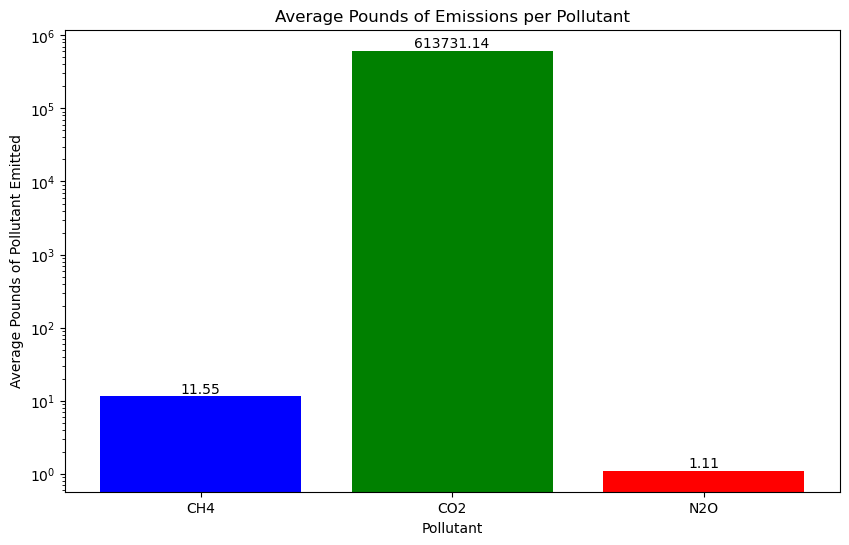

In [38]:
#AVERAGE POUNDS OF EMISSIONS BY POLLUTANT
import numpy as np

average_emissions = df.groupby('Pollutant')['Pounds of Pollutant Emitted'].mean().reset_index()

# Plot the average emissions for each pollutant with a logarithmic scale
plt.figure(figsize=(10, 6))
bars = plt.bar(average_emissions['Pollutant'], average_emissions['Pounds of Pollutant Emitted'], color=['blue', 'green', 'red'])
plt.xlabel('Pollutant')
plt.ylabel('Average Pounds of Pollutant Emitted')
plt.title('Average Pounds of Emissions per Pollutant')
plt.yscale('log')  # Set y-axis scale to logarithmic

# Annotate the bars with the corresponding values
for bar, value in zip(bars, average_emissions['Pounds of Pollutant Emitted']):
    plt.text(bar.get_x() + bar.get_width() / 2, value, '{:.2f}'.format(value), ha='center', va='bottom')

plt.show()

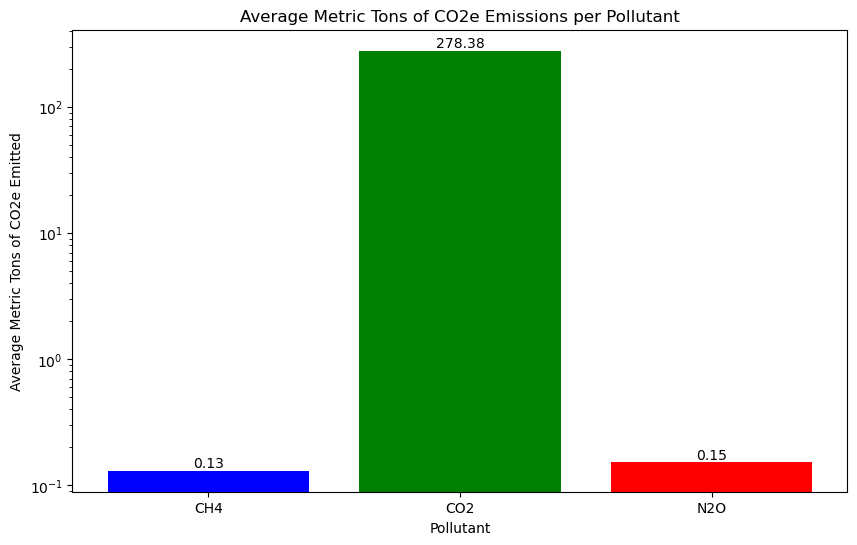

In [34]:
#AVERAGE METRIC TONS OF CO2E EMISSIONS PER POLLUTANT

import numpy as np

average_metric_emissions = df.groupby('Pollutant')['Metric Tons of CO2e Emitted'].mean().reset_index()

# Plot the average emissions for each pollutant with a logarithmic scale
plt.figure(figsize=(10, 6))
bars = plt.bar(average_metric_emissions['Pollutant'], average_metric_emissions['Metric Tons of CO2e Emitted'], color=['blue', 'green', 'red'])
plt.xlabel('Pollutant')
plt.ylabel('Average Metric Tons of CO2e Emitted')
plt.title('Average Metric Tons of CO2e Emissions per Pollutant')
plt.yscale('log')  # Set y-axis scale to logarithmic

# Annotate the bars with the corresponding values
for bar, value in zip(bars, average_metric_emissions['Metric Tons of CO2e Emitted']):
    plt.text(bar.get_x() + bar.get_width() / 2, value, '{:.2f}'.format(value), ha='center', va='bottom')

plt.show()


<Figure size 1000x600 with 0 Axes>

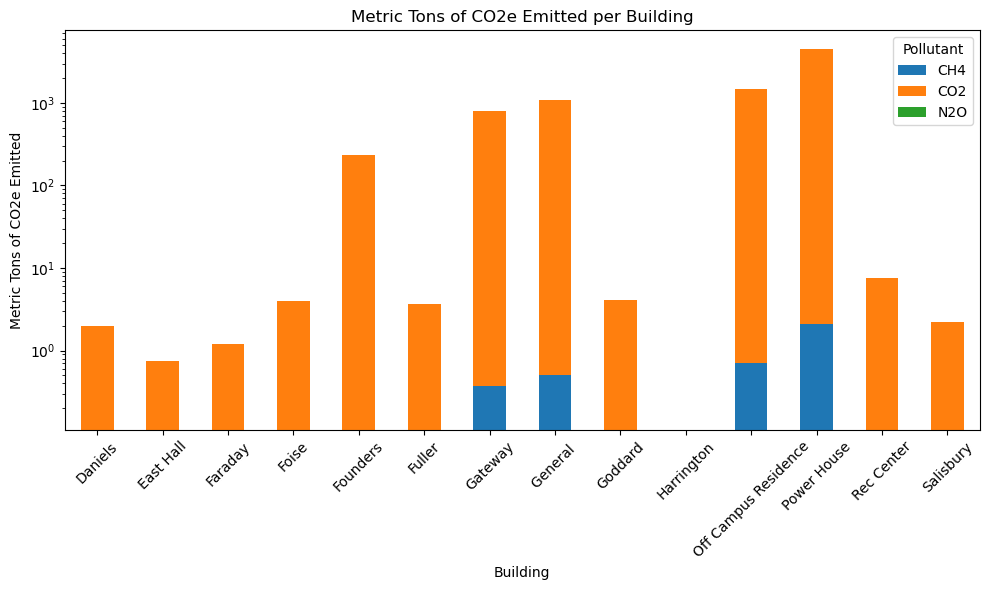

In [6]:
#METRIC TONS OF EACH POLLUTANT BY BUILDING
# Group by both 'Building' and 'Pollutant', then sum the 'Pounds of Pollutant Emitted'
grouped_data = df.groupby(['Building', 'Pollutant'])['Metric Tons of CO2e Emitted'].sum().reset_index()

# Pivot the data to have 'Building' as index, 'Pollutant' as columns, and 'Pounds of Pollutant Emitted' as values
pivot_data = grouped_data.pivot(index='Building', columns='Pollutant', values='Metric Tons of CO2e Emitted')

# Plot the bar graph
plt.figure(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Building')
plt.ylabel('Metric Tons of CO2e Emitted')
plt.title('Metric Tons of CO2e Emitted per Building')
plt.xticks(rotation=45)
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.legend(title='Pollutant')
plt.tight_layout()
plt.show()